# WeatherPy

---

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_longs = []

# Empty list for holding the city names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 644


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_name = city_weather["name"]

        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Long": city_long, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howrah
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | puerto aysen
Processing Record 5 of Set 1 | la'ie
Processing Record 6 of Set 1 | linxia chengguanzhen
Processing Record 7 of Set 1 | udachny
Processing Record 8 of Set 1 | missoula
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | qui nhon
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | oualidia
City not found. Skipping...
Processing Record 14 of Set 1 | auki
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | nikopol
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | caleta olivia
Processing Record 20 of Set 1 | egilsstadir
Processing Record 21 of Set 1 | lithgow
Processing Record 22 of Set 1 | dikhi

Processing Record 39 of Set 4 | puerto salgar
Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | olonkinbyen
Processing Record 42 of Set 4 | cabo san lucas
Processing Record 43 of Set 4 | odda
Processing Record 44 of Set 4 | cutral-co
Processing Record 45 of Set 4 | yangor
City not found. Skipping...
Processing Record 46 of Set 4 | tazovsky
Processing Record 47 of Set 4 | as sulayyil
Processing Record 48 of Set 4 | ar rutbah
Processing Record 49 of Set 4 | sungailiat
Processing Record 0 of Set 5 | malakal
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | la romana
Processing Record 3 of Set 5 | dzhalagash
Processing Record 4 of Set 5 | conde
Processing Record 5 of Set 5 | kilindoni
Processing Record 6 of Set 5 | miri
Processing Record 7 of Set 5 | enriquillo
Processing Record 8 of Set 5 | viedma
Processing Record 9 of Set 5 | kabare
Processing Record 10 of Set 5 | termini imerese
Processing Record 11 of Set 5 | polyarnyy
Processing Record

Processing Record 31 of Set 8 | ouesso
Processing Record 32 of Set 8 | smithers
Processing Record 33 of Set 8 | plastun
Processing Record 34 of Set 8 | saratamata
City not found. Skipping...
Processing Record 35 of Set 8 | baruun-urt
Processing Record 36 of Set 8 | cartagena
Processing Record 37 of Set 8 | vilyuysk
Processing Record 38 of Set 8 | zapala
Processing Record 39 of Set 8 | peniche
Processing Record 40 of Set 8 | berdigestyakh
Processing Record 41 of Set 8 | amahai
Processing Record 42 of Set 8 | lashio
Processing Record 43 of Set 8 | as suwayq
Processing Record 44 of Set 8 | marquette
Processing Record 45 of Set 8 | kaa-khem
Processing Record 46 of Set 8 | saint-pierre
Processing Record 47 of Set 8 | pundong
Processing Record 48 of Set 8 | entebbe
Processing Record 49 of Set 8 | mayuge
Processing Record 0 of Set 9 | ijuw
City not found. Skipping...
Processing Record 1 of Set 9 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 2 of Set 9 | am timan
Processing Reco

Processing Record 18 of Set 12 | terrace
Processing Record 19 of Set 12 | nuku'alofa
Processing Record 20 of Set 12 | raduzhnyy
Processing Record 21 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 22 of Set 12 | tanhacu
Processing Record 23 of Set 12 | musay'id
City not found. Skipping...
Processing Record 24 of Set 12 | tokar
Processing Record 25 of Set 12 | idri
Processing Record 26 of Set 12 | port lincoln
Processing Record 27 of Set 12 | roxas
Processing Record 28 of Set 12 | ghanzi
Processing Record 29 of Set 12 | camara de lobos
Processing Record 30 of Set 12 | shanwei
Processing Record 31 of Set 12 | olenino
Processing Record 32 of Set 12 | san patricio
Processing Record 33 of Set 12 | tucuma
Processing Record 34 of Set 12 | borogontsy
Processing Record 35 of Set 12 | kalamata
Processing Record 36 of Set 12 | omalur
Processing Record 37 of Set 12 | culebra
Processing Record 38 of Set 12 | ballina
Processing Record 39 of Set 12 | waterloo
Processing Rec

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Long          609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Howrah,22.5892,88.3103,28.00,89,40,2.06,IN,1690319707
1,Albany,42.6001,-73.9662,26.46,49,100,1.93,US,1690319475
2,Geraldton,-28.7667,114.6000,12.23,76,75,4.12,AU,1690319594
3,Puerto Aisén,-45.4000,-72.7000,5.13,100,99,1.10,CL,1690319717
4,Lā‘ie,21.6477,-157.9253,30.98,71,66,7.18,US,1690319617


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("../Output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("../Output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Howrah,22.5892,88.3103,28.00,89,40,2.06,IN,1690319707
1,Albany,42.6001,-73.9662,26.46,49,100,1.93,US,1690319475
2,Geraldton,-28.7667,114.6000,12.23,76,75,4.12,AU,1690319594
3,Puerto Aisén,-45.4000,-72.7000,5.13,100,99,1.10,CL,1690319717
4,Lā‘ie,21.6477,-157.9253,30.98,71,66,7.18,US,1690319617


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

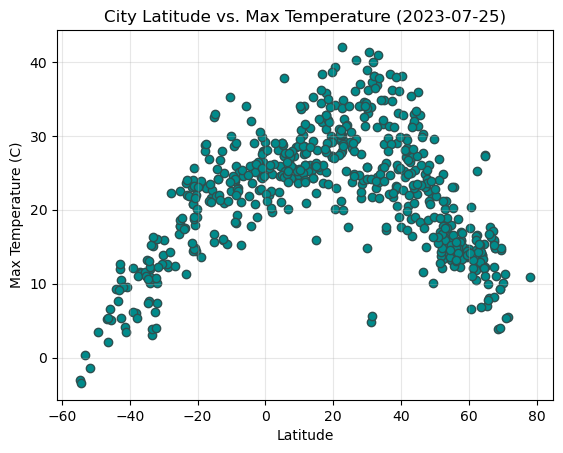

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color = "darkcyan", edgecolor = "darkslategrey")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-07-25)")
plt.grid(visible=True, which="major", axis="both", alpha=.3)

# Save the figure
plt.savefig("../Output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

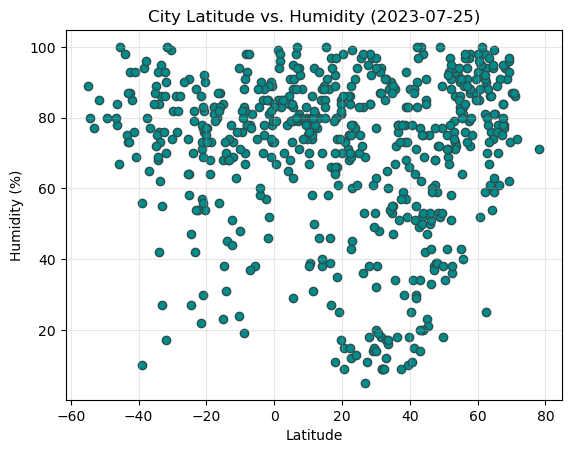

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = "darkcyan", edgecolor = "darkslategrey")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-25)")
plt.grid(visible=True, which="major", axis="both", alpha=.3)

# Save the figure
plt.savefig("../Output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

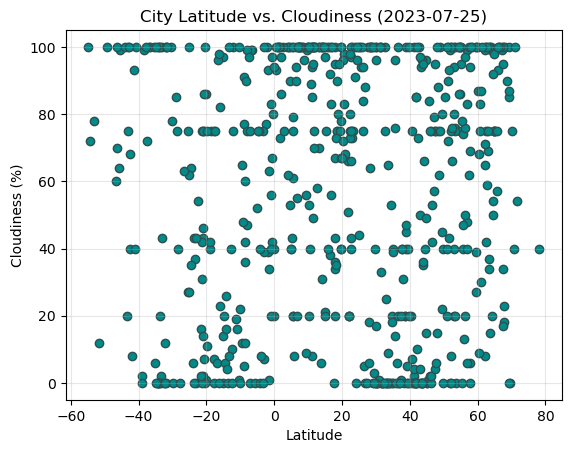

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = "darkcyan", edgecolor = "darkslategrey")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-25)")
plt.grid(visible=True, which="major", axis="both", alpha=.3)

# Save the figure
plt.savefig("../Output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

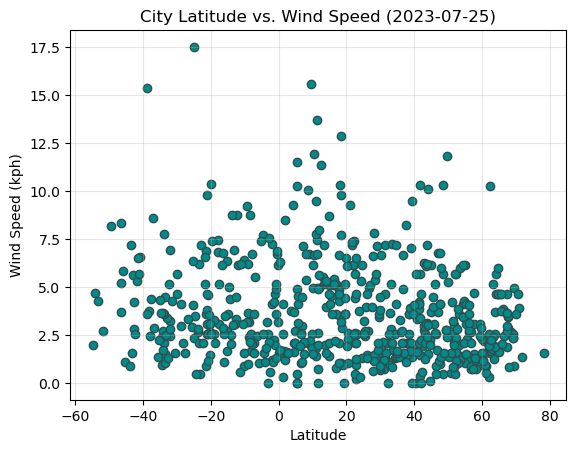

In [59]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = "darkcyan", edgecolor = "darkslategrey")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.title("City Latitude vs. Wind Speed (2023-07-25)")
plt.grid(visible=True, which="major", axis="both", alpha=.3)

# Save the figure
plt.savefig("../Output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:

# Linear regression model for latitude and variables of interest
def regression(x_values, y_values, ylabel, position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot the latitude vs variable of interest scatterplot with regression line and equation
    plt.scatter(x_values, y_values, color ="darkcyan", edgecolor = "darkslategrey")
    plt.plot(x_values, regress_values, color = "darkslateblue")
    plt.grid(visible=True, which="major", axis="both", alpha=.3)
    plt.annotate(line_eq, position, fontsize=12, weight= "bold", color="darkslateblue")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-value is {round(rvalue,4)}.")
    plt.show(close = None, block= None)


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Howrah,22.5892,88.3103,28.00,89,40,2.06,IN,1690319707
1,Albany,42.6001,-73.9662,26.46,49,100,1.93,US,1690319475
4,Lā‘ie,21.6477,-157.9253,30.98,71,66,7.18,US,1690319617
5,Linxia Chengguanzhen,35.6003,103.2064,17.30,67,96,1.46,CN,1690319718
6,Udachny,66.4167,112.4000,17.67,61,100,2.45,RU,1690319617


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Geraldton,-28.7667,114.6000,12.23,76,75,4.12,AU,1690319594
3,Puerto Aisén,-45.4000,-72.7000,5.13,100,99,1.10,CL,1690319717
11,Adamstown,-25.0660,-130.1015,22.54,91,100,17.51,PN,1690319575
12,Auki,-8.7676,160.7034,25.92,88,91,2.40,SB,1690319722
13,Blackmans Bay,-43.0167,147.3167,12.05,73,100,5.64,AU,1690319579


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6255.


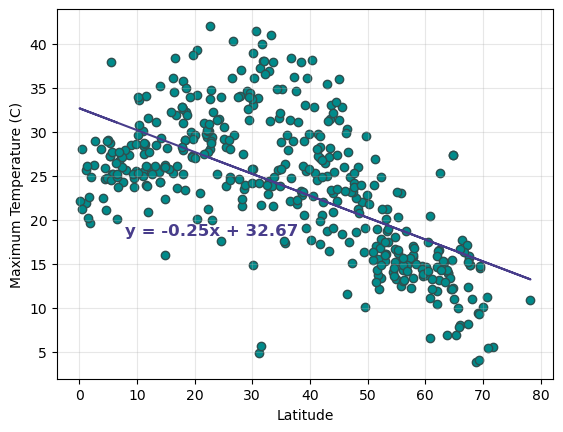

In [39]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
position = (8,18.2)
regression(x_values, y_values, "Maximum Temperature (C)", position)

The r-value is 0.8584.


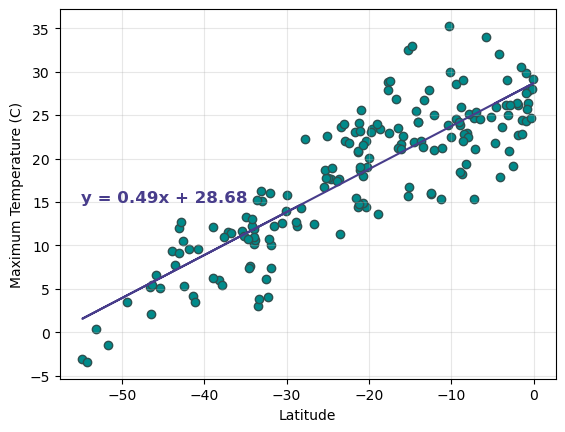

In [11]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
position = (-55, 15)
regression(x_values, y_values, "Maximum Temperature (C)", position)

**Discussion about the linear relationship:** \
There is a strong correlation between latitude and temperature, indicating that as you move away from the equator, the temperature generally gets cooler.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0577.


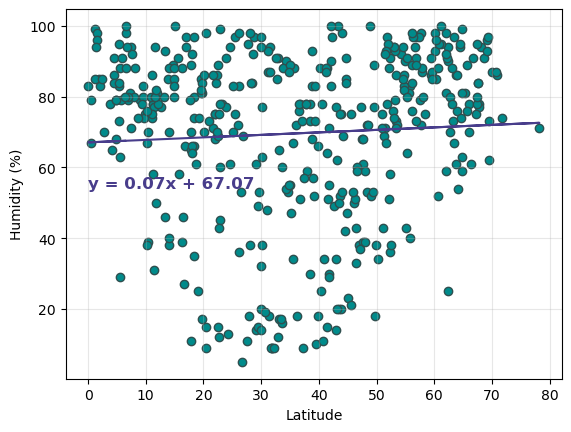

In [12]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
position = (0, 54)
regression(x_values, y_values, "Humidity (%)", position)

The r-value is -0.1014.


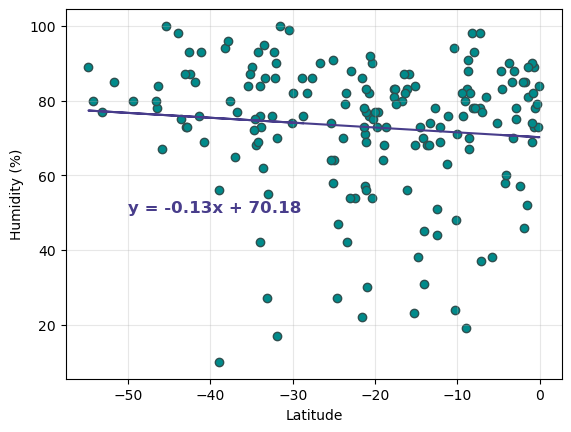

In [13]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
position = (-50, 50)
regression(x_values, y_values, "Humidity (%)", position)

**Discussion about the linear relationship:** \
There is only a very weak correlation between latitude and humidity. It suggests that variations in humidity are influenced more by other factors rather than latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.1123.


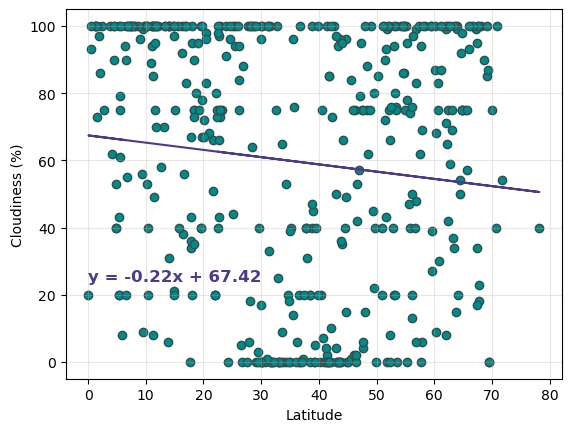

In [14]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
position = (0, 24)
regression(x_values, y_values, "Cloudiness (%)", position)

The r-value is -0.108.


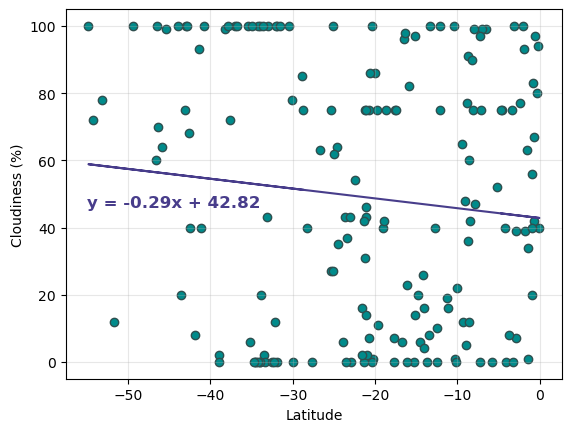

In [15]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
position = (-55, 46)
regression(x_values, y_values, "Cloudiness (%)", position)

**Discussion about the linear relationship:** \
There is a very weak correlation between latitude and cloudiness, but interestingly, this correlation appears to be in the opposite direction in the northern and southern hemispheres. This difference may be attributed to the sample data heavily favoring northern cities, rather than indicating a genuine difference in cloud cover between the hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.2172.


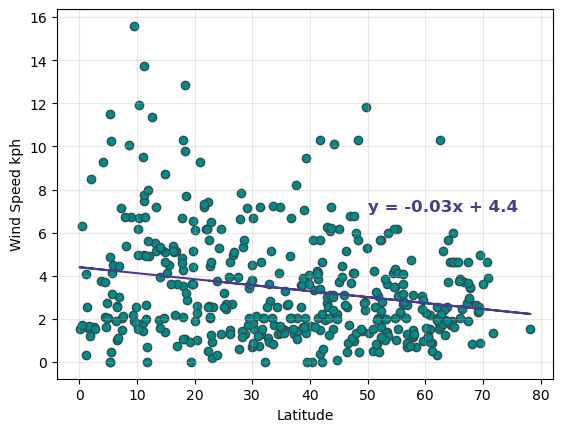

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
position = (50, 7)
regression(x_values, y_values, "Wind Speed kph", position)

The r-value is -0.0696.


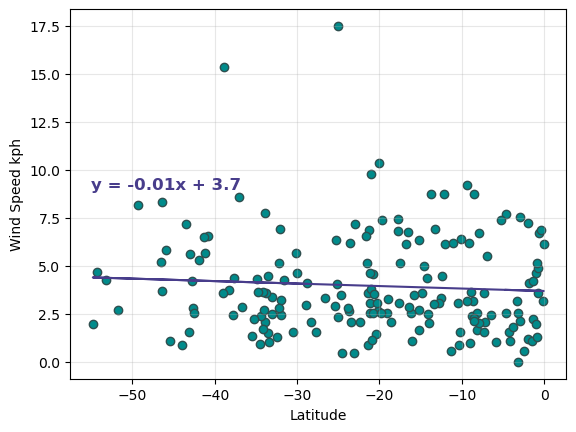

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
position = (-55, 9)
regression(x_values, y_values, "Wind Speed kph", position)

**Discussion about the linear relationship:** \
In the northern hemisphere, there is a weak correlation between latitude and wind speed, while it is even weaker in the southern hemisphere. Moreover, the slope of the line is steeper in the northern hemisphere, indicating that there may be more complex non-linear relationships to explore in the context of wind speed and latitude.